In [14]:
#IMPORTING THE LIBRARIES

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np              
import librosa as lb             
from IPython.display import Audio 
import librosa.display

In [15]:
#Importing the audio object of the analysis

Audio_file = '#Insert here the address of your audio archive and its extension (.wav, .m4a, etc...)'              #Insert here the address of your audio archive and its extension (.wav, .m4a, etc...)

LABEL = 'Insert here the name of the archive'                                                                     #Insert here the name of the archive

In [16]:
#Load an audio file as a floating point time series

signal_audio, sr = lb.load(Audio_file, sr=None, mono=True)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [17]:
#Make sure this is the desired audio to be analysed

print("AUDIO LOADED")
Audio(data=signal_audio, rate=sr)

AUDIO LOADED


In [18]:
#Calculating the period of sinal, and arranging into an array  

fs = sr
Ts = 1/fs
n = np.arange(0, len(signal_audio)*Ts, Ts)

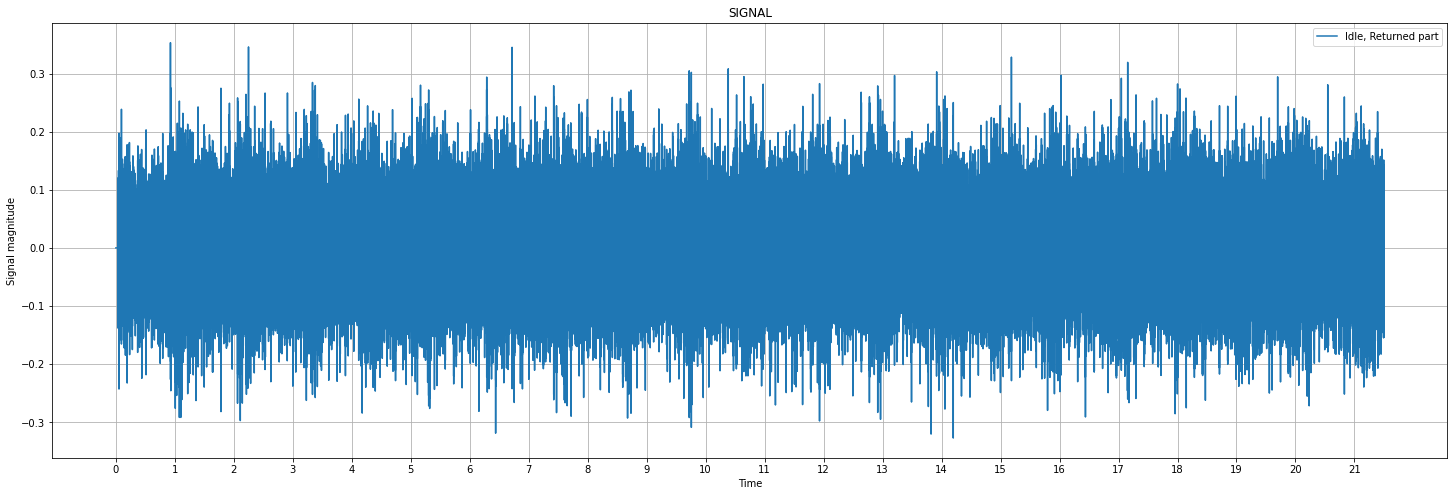

In [19]:
#Generating waveform of signal audio

plt.figure( figsize=(25, 8))
plt.plot(n, signal_audio,label=LABEL) 
plt.title('SIGNAL');
plt.ylabel('Signal magnitude')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, max(n), step=1))
plt.show()

In [20]:
#Performing RFFT of the signal

xk = np.abs(np.fft.rfft(signal_audio))

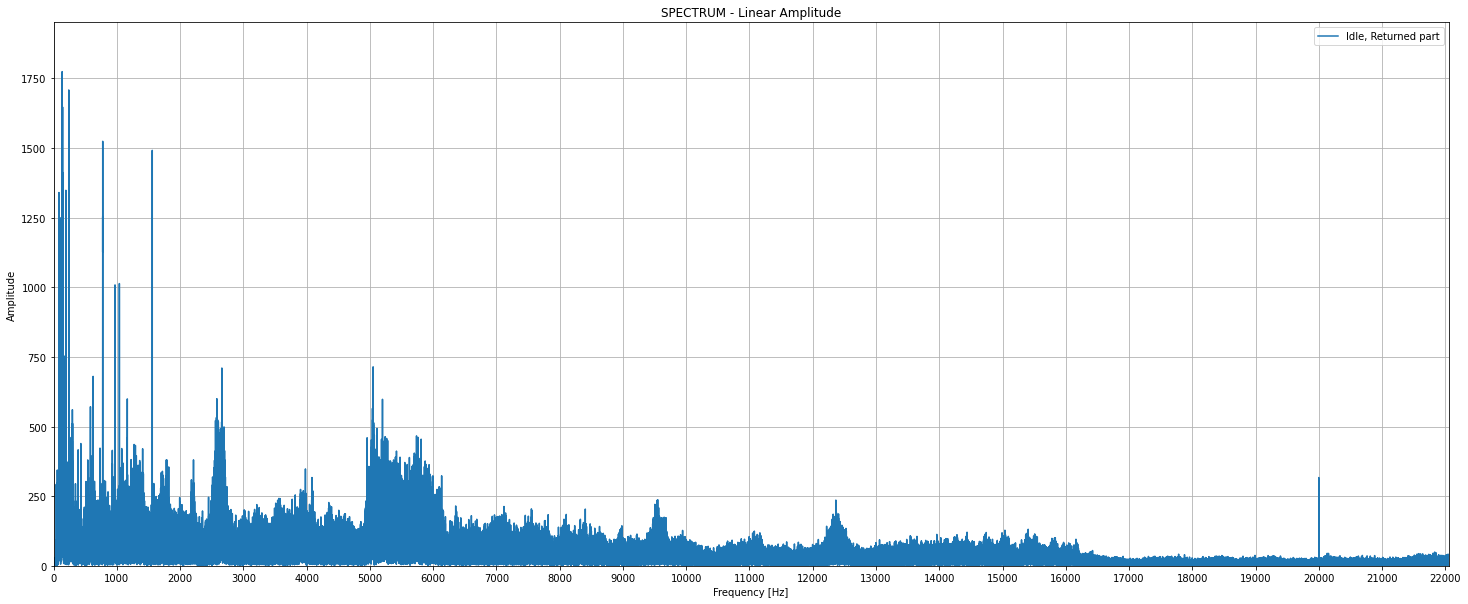

In [21]:
#Ploting the spectrum of the signal - Linear amplitude

freqs = np.arange(len(xk))
freqs = freqs * sr/ len(freqs)
plt.figure( figsize=(25, 10))
plt.plot(freqs,xk,label=LABEL)
plt.title('SPECTRUM - Linear Amplitude');
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.xticks(np.arange(0, max(freqs)/2, step=1000))
plt.xlim([0,max(freqs)/2]) 
plt.ylim([0,max(xk)*1.1])
plt.grid(True)
plt.legend()
plt.show()
print()


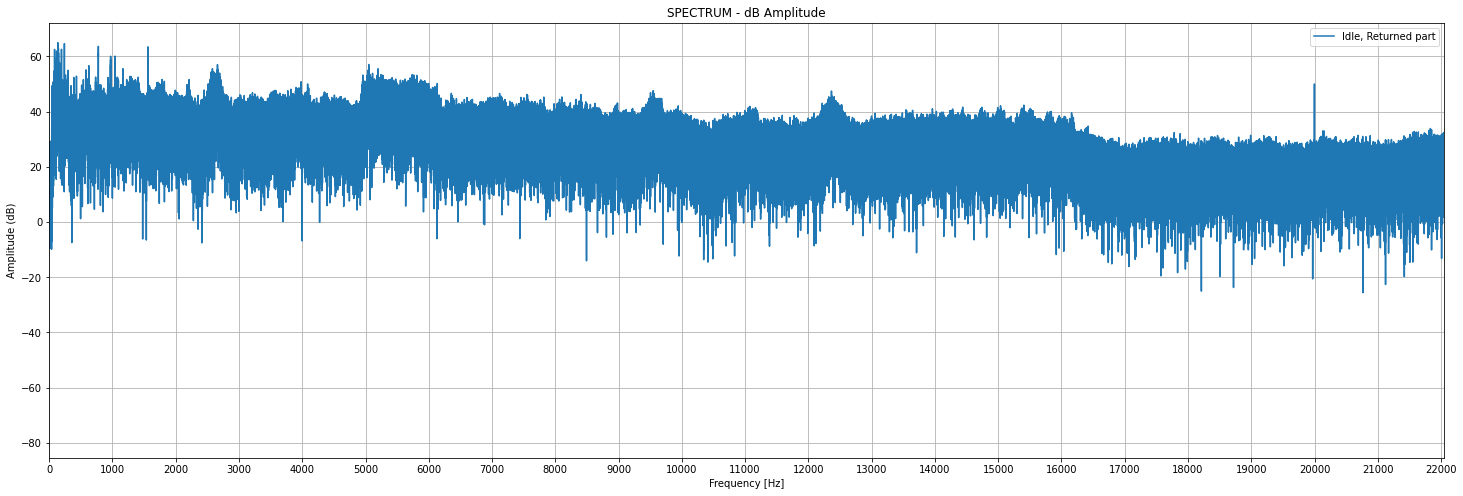

In [24]:
#Ploting the spectrum of the signal - dB amplitude

magnitude_db = 20 * np.log10(xk)
freqs = np.arange(len(xk))
freqs = freqs * sr/ len(freqs)
plt.figure( figsize=(25, 8))
plt.plot(freqs,magnitude_db,label=LABEL)
plt.title('SPECTRUM - dB Amplitude');
plt.ylabel('Amplitude (dB)')
plt.xlabel('Frequency [Hz]')
plt.xticks(np.arange(0, max(freqs)/2, step=1000))
plt.xlim([0,max(freqs)/2])
plt.grid(True)
plt.legend()
plt.show()
print()

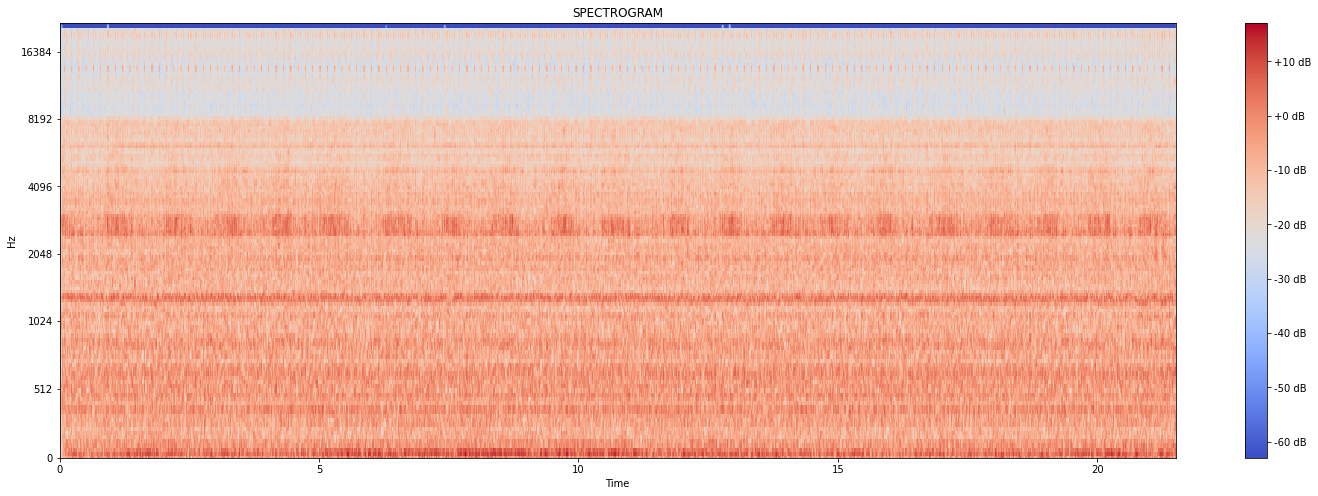

In [26]:
#Ploting the mel spectrogram

mel_spectrogram = lb.feature.melspectrogram(signal_audio, sr=sr, n_mels=128)

plt.figure(figsize=(25,8))
lb.display.specshow(lb.power_to_db(mel_spectrogram), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('SPECTROGRAM')
plt.show()

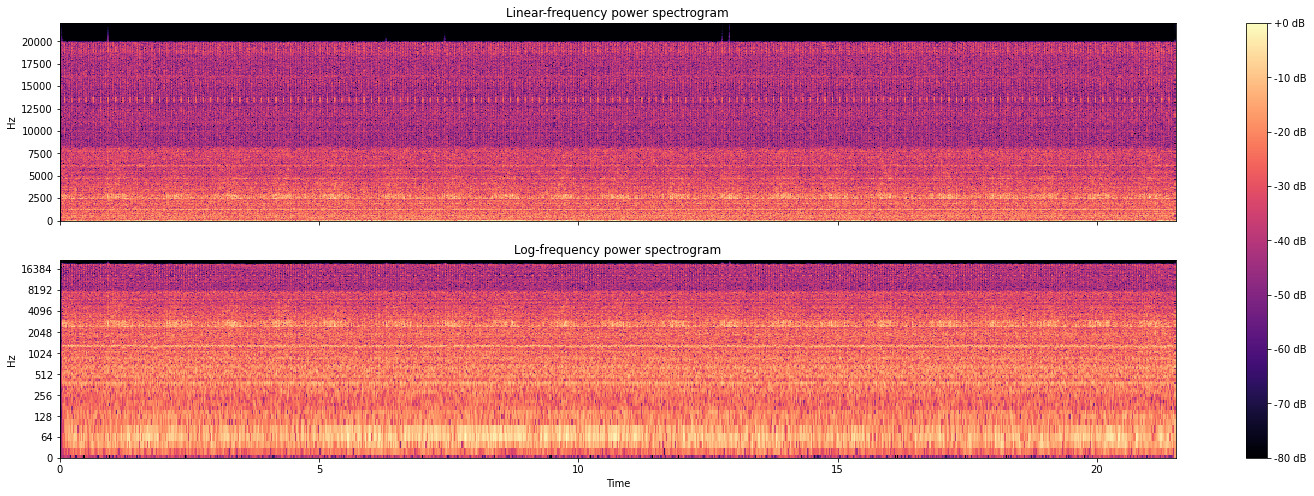

In [28]:
#Ploting the graphics of frequency power spectrogram

fig, ax = plt.subplots(figsize=(25, 8), nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal_audio)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])

ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal_audio, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")